In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.optimize import minimize # Python version of R's optim() function
from sklearn import datasets
import matplotlib.pyplot as plt

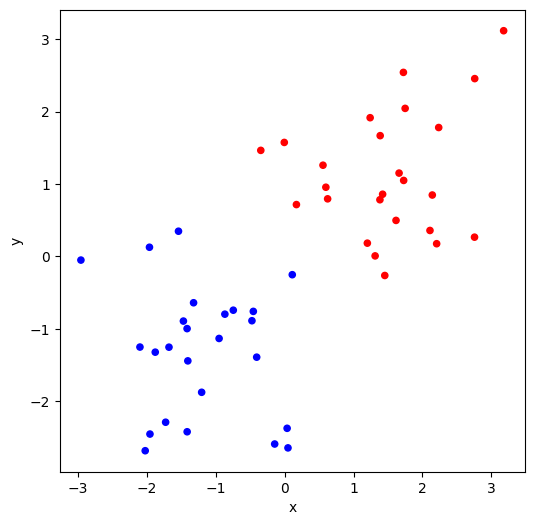

In [12]:
# Set the seed of the random number generator
np.random.seed(19)

# Generate features of cases and store them in the matrix X
Xa = np.random.normal(loc=+1.2, size=(25,2))
Xb = np.random.normal(loc=-1.2, size=(25,2))
X = np.vstack([Xa, Xb])
X = np.hstack([np.ones((X.shape[0],1)), X])

# Generate target labels: -1 for blue, 1 for read
n = X.shape[0]
y = [-1 if i < n//2 else 1 for i in range(n)]

# Plot the observations
col = ['blue' if value > 0 else 'red' for value in y] # color of the points (-1: blue, +1: red)
ax = pd.DataFrame(X[:,1:], columns=['x','y']).plot('x','y',kind='scatter',figsize=(6,6),c=col)

In [ ]:
### Exercise 1##
# Your code to implement Rosenblatt's algorithm (see above)

# Step 1
w0 = np.array([-14,-7,2])
eta = 0.001

# Steps 2 and 3
w = w0.copy()

for j in range(100000):
    for i in range(X.shape[0]):
        d_i = np.sign(np.sum(X[i] * w))
        w = w + eta * (y[i] - d_i) * X[i] # (y[i] - d_i) = 0, if no error

  
# print the set of weights found by Rosenblatt's algorithm
print(w)

[-0.72       -9.00681459 -6.76134796]


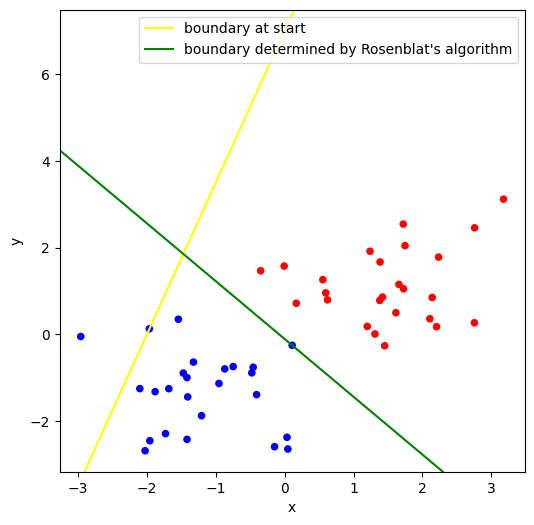

In [14]:
# Visualize: Result should look like figure above
col = ['blue' if value > 0 else 'red' for value in y] # color of the points (-1: blue, +1: red)
ax = pd.DataFrame(X[:,1:], columns=['x','y']).plot('x','y',kind='scatter',figsize=(6,6),c=col)

# Add the line that is the decision boundary found by the algorithm and the line that we started with
line_start = ax.axline((0,7), slope = 3.5, c='yellow')
line_end   = ax.axline((0,-w[0]/w[2]), slope = -w[1]/w[2], c='green')

# Add a legend
ax.legend([line_start, line_end], ['boundary at start', 'boundary determined by Rosenblat\'s algorithm']) # Adding legend

In [31]:
def my_mlp(w, X, sigma = np.tanh):

    W1 = w[:4*6].reshape((4,6))
    W2 = w[W1.size:W1.size+7*4].reshape((7,4))
    W3 = w[W1.size+W2.size:W1.size+W2.size+1*7].reshape((1,7))

    a1 = sigma(W1 @ X)
    a2 = sigma(W2 @ a1)
    f = sigma(W3 @ a2)

    return f

np.random.seed(123)
w = np.random.normal(size=(6*4 + 4*7 + 7)) # vector with input weight values
X = np.random.normal(size=(6,10)) # matrix with 6 feature values for each of 10 simulated observations
my_mlp(w, X)


array([[-0.8293042 , -0.26022696, -0.82222961, -0.32002817,  0.98262593,
         0.98724623,  0.98356712,  0.8642152 , -0.98754598,  0.802443  ]])

In [36]:
def MSE_func(w, X, y): # give the appropriate name and arguments
    f = my_mlp(w, X)
    MSE = np.sum((f-y)**2)
    return MSE

# Tests
np.random.seed(123)
w = np.random.normal(size=(6*4 + 4*7 + 7)) # vector with input weight values
X = np.random.normal(size=(6, 10)) # matrix with 6 feature values for each of 10 simulated observations
y = np.array([1 if i < X.shape[1]//2 else -1 for i in range(X.shape[1])]) # target labels
mse = MSE_func(w,X,y)
print(mse)

w = np.ones(shape=(6*4 + 4*7 + 7))
mse = MSE_func(w,X,y)
print(mse)

w = np.ones(shape=(6*4 + 4*7 + 7))
X = np.ones(shape=(6, 10))
mse = MSE_func(w,X,y)
print(mse)

24.605763094113463
15.999973100543675
19.99996642509007


y 
-1    138
 1    112
Name: count, dtype: int64

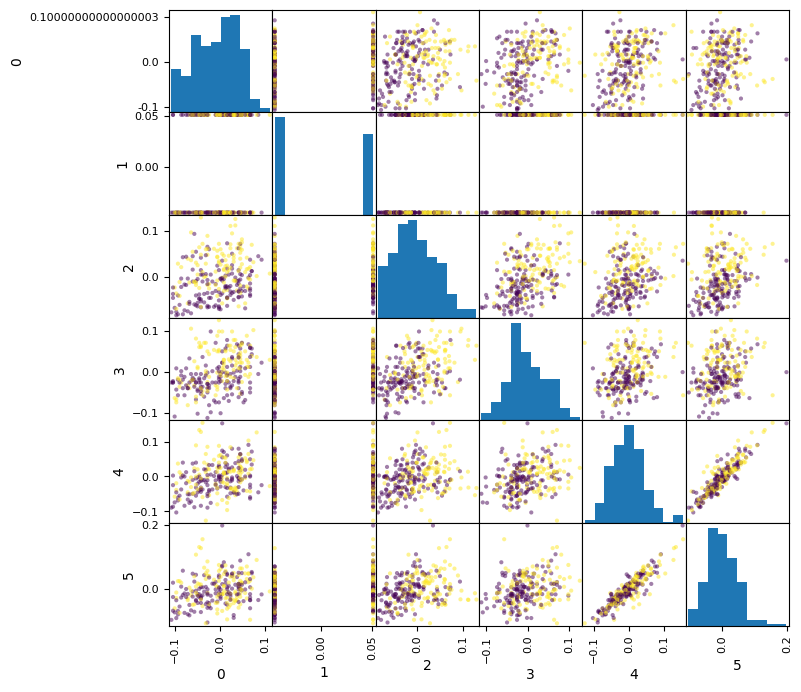

In [37]:
diabetes = datasets.load_diabetes() # famous 'diabetes' dataset
iris = datasets.load_iris()
X_train = diabetes['data'][:250,0:6] # use only the first 6 columns; transpose because cases should be in columns
y_train = diabetes['target'][:250]
cutoff = np.mean(y_train)
y_train = np.array([-1 if y_train[i] < cutoff else +1 for i in range(len(y_train))])

# Inspecting the data
pd.plotting.scatter_matrix(pd.DataFrame(X_train), c=y_train+2, figsize=(8,8));
pd.DataFrame({'y':y_train}).value_counts()

In [43]:
from scipy.optimize import minimize

np.random.seed(123)
w_start = np.random.normal(size=(4*6 + 7*4 + 1*7))
fit = minimize(MSE_func, w_start, (X_train.T, y_train), options={'maxiter':4}) # fill in _, __, and ___

print(f"""loss function value: {fit['fun']},\n\nparams: {fit['x']}""")

loss function value: 199.03212975613712,

params: [-1.07591804  0.96133315 -0.15293035 -1.54813066 -0.71869738  1.68411977
 -2.43377014 -0.41170711  1.75237352 -0.53489008 -0.48633623 -0.21371718
  1.48427021 -0.68286299 -0.21747715 -0.28776438  2.11275083  2.00953357
  0.98267223  0.21664309  1.14317517  1.34985423 -0.65851843  0.94747377
 -1.50470505 -0.31696581  0.75529235 -0.96600952  0.04936883 -1.08884055
 -0.19376217 -2.90502807 -1.76835391 -0.69355408  0.91911412 -0.16659594
 -0.20275133  0.95755422 -0.94724489  0.55158407 -0.9812797  -1.57319241
 -0.41174094  0.8953965  -0.01328685  0.22592204  2.19538664  0.79262259
  0.66370115  2.39011677 -1.34587106 -0.52121136  1.27223061 -1.54867258
  0.05121973  1.32863863  0.85753395  1.50273385  1.43374792]


In [44]:
# Compute the predicted values for the training set
pred = my_mlp(fit.x,X_train.T).squeeze() # squeeze drops unnecessary dimensions in an array (like 'drop()' in R)
pred = [-1 if pred[i] < 0 else +1 for i in range(len(pred))]

# Accuracy
np.mean(y_train == pred)

np.float64(0.692)

In [45]:
X_test = diabetes['data'][250:,0:6]
y_test = diabetes['target'][250:]
y_test = np.array([-1 if y_test[i] < cutoff else +1 for i in range(len(y_test))]) 

pred = my_mlp(fit.x, X_test.T).squeeze() 
pred = [-1 if pred[i] < 0 else +1 for i in range(len(pred))]
np.mean(y_test == pred)

np.float64(0.7447916666666666)

Gradient Descent

In [46]:
## Your code to implement dR

def dR(beta, x, y):
    dbeta_0 = 2*np.mean(beta[0]+beta[1]*x - y) # implement the above formula for dR/dβ₀
    dbeta_1 = 2*np.mean((beta[0]+beta[1]*x - y)*x) # implement the above formula for dR/dβ₁
    return np.array([dbeta_0, dbeta_1])


## Test your code
# test 1
beta = np.array([-0.1, 1.1])
x = np.arange(-3,3)
y = np.arange(-3,3)+5
d = dR(beta,x,y)
print(d)

# test 2
x = np.arange(-3,3)**2
y = np.arange(-3,3)+5
d = dR(beta,x,y)
print(d)

[-10.3          5.73333333]
[-2.23333333 18.86666667]


<Axes: xlabel='x', ylabel='y'>

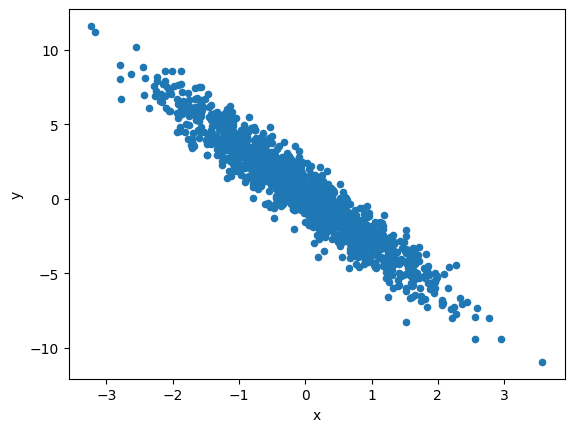

In [47]:
x = np.random.normal(size=1500)
y = 0.3 - 3.14*x + np.random.normal(size=x.size)
pd.DataFrame({"x":x, "y":y}).plot("x","y", kind="scatter")

In [53]:
eta = 0.01
beta = np.array([-0.1, 1.1])
for _ in range(10000):
    d = dR(beta, x, y)
    beta = beta - eta * d

print(beta)

[ 0.3021205  -3.13519587]


In [49]:
from sklearn.linear_model import LinearRegression

fit = LinearRegression().fit(x.reshape((x.size,1)),y)
[fit.intercept_, fit.coef_[0]] # should be same as b for the first 5 digits or so

[np.float64(0.30212049617853126), np.float64(-3.1351958692989124)]